# Assignment 6: Apply NB

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

In [0]:
import pandas
data = pandas.read_csv('D:/print/assignments/navie bayes/preprocessed_data.csv')
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)



<h2>Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>Make Data Model Ready: encoding eassay using BOW</h2>

In [0]:

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


<h2>Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_sub_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_cat_sub_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_cat_sub_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_cat_sub_ohe.shape, y_train.shape)
print(X_cv_clean_cat_sub_ohe.shape, y_cv.shape)
print(X_test_clean_cat_sub_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)



After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_number_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_number_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_number_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_number_norm.shape, y_train.shape)
print(X_cv_number_norm.shape, y_cv.shape)
print(X_test_number_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
v=np.array(X_train_number_norm)
o=np.array(X_train_price_norm)
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe,X_train_clean_cat_sub_ohe,v,o)).tocsr()
v=np.array(X_cv_number_norm)
o=np.array(X_cv_price_norm)
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_cat_ohe,X_cv_clean_cat_sub_ohe,v,o)).tocsr()
v=np.array(X_test_number_norm)
o=np.array(X_test_price_norm)
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe,X_test_clean_cat_sub_ohe,v,o)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)





Final Data matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


<h2>Appling NB on different kind of featurization SET 1</h2>



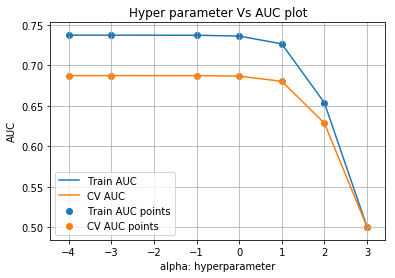

Best alpha: 0.0001


In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import math


neigh =MultinomialNB()
parameters = {'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
clf = RandomizedSearchCV(neigh, parameters,n_iter=7, cv=3, scoring='roc_auc')
best_alpha=clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#print(results)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']
K=list(K)
for i in range(len(K)):
   
    K[i]=math.log10(K[i])

plt.plot(K,train_auc,label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()
print('Best alpha:',best_alpha.best_estimator_.get_params()['alpha'])

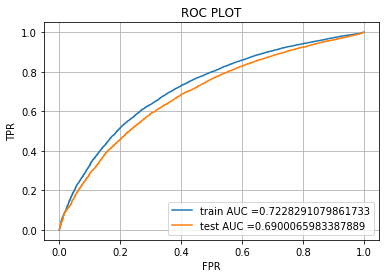

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB

best_alpha=best_alpha.best_estimator_.get_params()['alpha']
clf =MultinomialNB(alpha=best_alpha)
clf.fit(X_tr,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs


y_train_pred=(clf.predict_proba(X_tr)[:,1])
y_test_pred=(clf.predict_proba(X_te)[:,1])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.44678783323424465 for threshold 0.797
Train confusion matrix
[[ 4915  2511]
 [13523 28092]]
Test confusion matrix
[[ 3401  2058]
 [10391 20202]]


<h2>Appling NB on different kind of featurization SET-2</h2>

In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(min_df=10,max_features=5000)


vectorizer1.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer1.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer1.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer1.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
v=np.array(X_train_number_norm)
o=np.array(X_train_price_norm)
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_cat_ohe,X_train_clean_cat_sub_ohe,v,o)).tocsr()
v=np.array(X_cv_number_norm)
o=np.array(X_cv_price_norm)
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_clean_cat_ohe,X_cv_clean_cat_sub_ohe,v,o)).tocsr()
v=np.array(X_test_number_norm)
o=np.array(X_test_price_norm)
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_cat_ohe,X_test_clean_cat_sub_ohe,v,o)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)


Final Data matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


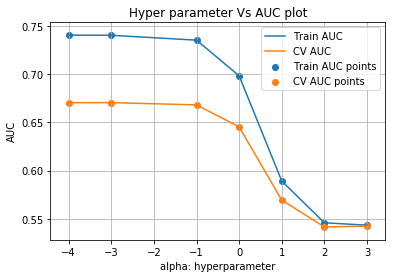

Best alpha: 0.001


In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import math


alpha =MultinomialNB()
parameters = {'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
clf1 = RandomizedSearchCV(alpha, parameters, n_iter=7,cv=3, scoring='roc_auc')
best_alpha1=clf1.fit(X_tr_tfidf, y_train)

results1 = pd.DataFrame.from_dict(clf1.cv_results_)
#print(results)
results1 = results1.sort_values(['param_alpha'])

train_auc_set2= results1['mean_train_score']
train_auc_std_set2= results['std_train_score']
cv_auc_set2 = results1['mean_test_score'] 
cv_auc_std_set2= results['std_test_score']
K2 =  results1['param_alpha']
K2=list(K2)
for i in range(len(K2)):
   
    K2[i]=math.log10(K2[i])
plt.plot(K2,train_auc_set2,label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K2, cv_auc_set2, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K2, train_auc_set2, label='Train AUC points')
plt.scatter(K2, cv_auc_set2, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()
print('Best alpha:',best_alpha1.best_estimator_.get_params()['alpha'])

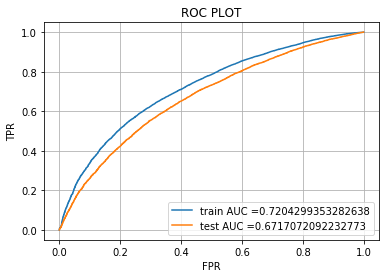

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB

best_alpha=best_alpha1.best_estimator_.get_params()['alpha']
clf3 =MultinomialNB(alpha=best_alpha)
n=clf3.fit(X_tr_tfidf,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred_set2 = clf3.predict_proba(X_tr_tfidf)[:,1]       
y_test_pred_set2 = clf3.predict_proba(X_te_tfidf)[:,1]

train_fpr_set2, train_tpr_set2, tr_thresholds_set2 = roc_curve(y_train, y_train_pred_set2)
test_fpr_set2, test_tpr_set2, te_thresholds_set2 = roc_curve(y_test, y_test_pred_set2)

plt.plot(train_fpr_set2, train_tpr_set2, label="train AUC ="+str(auc(train_fpr_set2, train_tpr_set2)))
plt.plot(test_fpr_set2, test_tpr_set2, label="test AUC ="+str(auc(test_fpr_set2, test_tpr_set2)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould_set2, fpr_set2, tpr_set2):
    t_set2 = threshould_set2[np.argmax(tpr_set2*(1-fpr_set2))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr_set2*(1-fpr_set2)), "for threshold", np.round(t_set2,3))
    return t_set2

def predict_with_best_t(proba_set2, threshould_set2):
    predictions_set2 = []
    for i in proba_set2:
        if i>=threshould_set2:
            predictions_set2.append(1)
        else:
            predictions_set2.append(0)
    return predictions_set2

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t_set2 = find_best_threshold(tr_thresholds_set2, train_fpr_set2, train_tpr_set2)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_set2, best_t_set2)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_set2, best_t_set2)))

the maximum value of tpr*(1-fpr) 0.4397195587435503 for threshold 0.854
Train confusion matrix
[[ 5061  2365]
 [14765 26850]]
Test confusion matrix
[[ 3408  2051]
 [11357 19236]]


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit_transform(data['essay'].values)

neg_class=(-clf.feature_log_prob_[0,:]).argsort()
pos_class=(-clf.feature_log_prob_[1,:]).argsort()

k=np.sort(clf.feature_log_prob_[0,:])
desc_sort=k[::-1]

ka=np.sort(clf.feature_log_prob_[1,:])
desc_sorta=ka[::-1]

print("top 20 features for class not accepted\n",np.take(vectorizer.get_feature_names(),neg_class[:20]),"\n log probability values",desc_sort[:20])
print("top 20 features for class  accepted\n",np.take(vectorizer.get_feature_names(),pos_class[:20]),"\n log probability values",desc_sorta[:20])

top 20 features for class not accepted
 ['arboreal' 'annotate' 'admirers' 'akita' '29th' 'alivestudiosco'
 'adhered' 'assiniboine' 'accordingly' 'assembled' 'alander' 'babyish'
 'alcoholism' 'agawam' 'auditioning' 'aleks' 'autocorrect' '325' 'baby'
 'aes'] 
 log probability values [-3.23135965 -4.32089182 -4.655414   -4.696675   -4.81611885 -4.98790917
 -4.99602675 -5.02431899 -5.04099001 -5.04991541 -5.06800882 -5.15562599
 -5.2029158  -5.22938183 -5.26991392 -5.35429372 -5.37924096 -5.53353199
 -5.55498266 -5.58204709]
top 20 features for class  accepted
 ['arboreal' 'annotate' 'akita' 'admirers' '29th' 'assembled' 'assiniboine'
 'alivestudiosco' 'alander' 'adhered' 'accordingly' 'babyish' 'agawam'
 'alcoholism' 'auditioning' 'aleks' 'autocorrect' 'analytic' 'attains'
 'baby'] 
 log probability values [-3.2208376  -4.36461335 -4.67659122 -4.72984444 -4.75337565 -4.97287358
 -5.02009403 -5.02814208 -5.04985056 -5.06756733 -5.09821255 -5.20916117
 -5.23730802 -5.25385545 -5.29084125 -5

|vectorizer|Model|Hyperparameter|AUC
|---|---|---|---|
|BOW|Navie Bayes|0.0001|0.69
|TFIDF|Navie Bayes|0.001|0.67